# 300_Analysis_Best_Month

## Purpose

In this notebook we will take our third research question and begin the analysis of the fourth research question. Which is "What month has the highest release rate and does this correlate with overall sales and performance of a game". In this notebook what we will analyse is 
- yearly sales
- monthly sales across each year
- monthly sales combined 
- genres by region 
- Average game sales 
- Average game reviews
- top 5 games do they always come out in te highest month
- correlation between global sales and scores by month and year
- correlation between global sales and games releases by year

### Datasets

- Input : Clean_Combined.pkl && Clean_Game_Sales_Total.pkl
- Output : 300_Best_Month

In [1]:
import os 
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt 

%matplotlib inline 

In [6]:
if not os.path.exists("../../data/prep/Clean_Combined.pkl"):
    print("Missing Dataset File")

In [4]:
if not os.path.exists("../../data/prep/Clean_Games_Sales_Total.pkl"):
    print("Missing Dataset File")

## Analysis 

Let's begin with the analysis to see what month had the highest release rate. 

In [7]:
combined = pd.read_pickle("../../data/prep/Clean_Combined.pkl")
combined.shape

(6434, 12)

In [8]:
combined.head()

Name Platform     Genre Publisher  NA_Sales  \
Date                                                                           
2006-11-13                 Wii Sports      Wii    Sports  Nintendo     41.36   
2008-04-20             Mario Kart Wii      Wii    Racing  Nintendo     15.68   
2009-07-16          Wii Sports Resort      Wii    Sports  Nintendo     15.61   
2006-05-06      New Super Mario Bros.       DS  Platform  Nintendo     11.28   
2009-11-13  New Super Mario Bros. Wii      Wii  Platform  Nintendo     14.44   

            EU_Sales  JP_Sales  Other_Sales  Global_Sales score_phrase  score  \
Date                                                                            
2006-11-13     28.96      3.77         8.45         82.53         Good    7.5   
2008-04-20     12.76      3.79         3.29         35.52        Great    8.5   
2009-07-16     10.93      3.28         2.95         32.77         Good    7.7   
2006-05-06      9.14      6.50         2.88         29.80      Amazing    9.5   
2009-11-13      6.94      4.70         2.24         28.32        Great    8.9   

           editors_choice  
Date                       
2006-11-13              N  
2008-04-20              Y  
2009-07-16              N  
2006-05-06              Y  
2009-11-13              Y

In [9]:
sales = pd.read_pickle("../../data/prep/Clean_Games_Sales_Total.pkl")
sales.shape

(16444, 11)

In [10]:
sales.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales Developer  
0     41.36     28.96      3.77         8.45         82.53  Nintendo  
1     29.08      3.58      6.81         0.77         40.24       NaN  
2     15.68     12.76      3.79         3.29         35.52  Nintendo  
3     15.61     10.93      3.28         2.95         32.77  Nintendo  
4     11.27      8.89     10.22         1.00         31.37       NaN

### Monthly Analysis 

For the monthly analysis we will be analysing the combined data as this one contains the monthly details of each game. We will have to split the information by year more than likely and then one we have it in the year format we will be able to split it into the monthly format. 

In [ ]:
# Here we are resample by the business year end. To calculate the yearly releases.
combined['Platform'].resample("BA").count()

As seen above again we get 2008 as our highest year in terms of Platform releases with a total of 741 platforms during that year. 

In [ ]:
# Then we will resample by months for each year
gamestotal_bymonth = combined['Platform'].resample("M").count()
gamestotal_bymonth.head()

As seen above we have analysed on a monthly basis for each year and calculated the number of publishers per year and then divided it per month for that year. What we would like to do now is count the total amount of publishers for each month over the 20 years. This will help us tell which month has the highest release rate because it will group by the publishers. 

In [77]:
# Then we will use strftime to convert the index column into full month names as a string. 
combined.groupby(combined.index.strftime('%B'))['Publisher'].count()

April         354
August        413
December      479
February      453
January       286
July          266
June          460
March         594
May           348
November     1101
October      1005
September     674
Name: Publisher, dtype: int64

As seen above November has the highest release rate in terms of publishers which is interesting as this is a good month financially to release a game as this is the month before christmas, meaning more people will be buying games at this time of the year.

### Analysing Monthly Sales across Regions

As above we will now divide the data into our 4 regions. Eu , Japan, Global and North American sales. We will again divide everything up into business end years, months by year and then convert it into full month names and count the highest month name in terms of sale for that region. 

###### NA_Sales

In [88]:
combined['NA_Sales'].resample("BA").sum()

Date
1996-12-31     30.44
1997-12-31     60.15
1998-12-31     67.21
1999-12-31     95.03
2000-12-29     78.30
2001-12-31     99.94
2002-12-31    138.82
2003-12-31    125.08
2004-12-31    147.29
2005-12-30    125.45
2006-12-29    182.76
2007-12-31    224.38
2008-12-31    268.09
2009-12-31    242.62
2010-12-31    185.96
2011-12-30    168.94
2012-12-31    120.91
2013-12-31    115.54
2014-12-31     55.05
2015-12-31     35.50
2016-12-30     13.99
Freq: BA-DEC, Name: NA_Sales, dtype: float64

In [283]:
NA_bymonth = combined['NA_Sales'].resample("M").sum()
NA_bymonth.head()

Date
1996-09-30     7.47
1996-10-31      NaN
1996-11-30    16.52
1996-12-31     6.45
1997-01-31     4.75
Freq: M, Name: NA_Sales, dtype: float64

In [86]:
combined.groupby(combined.index.strftime('%B'))['NA_Sales'].sum()

April        112.34
August       187.00
December     132.98
February     127.96
January       83.36
July          88.11
June         127.52
March        168.71
May          136.50
November     679.61
October      446.35
September    291.01
Name: NA_Sales, dtype: float64

##### EU_Sales

In [90]:
combined['EU_Sales'].resample("BA").sum()

Date
1996-12-31     13.82
1997-12-31     26.24
1998-12-31     30.52
1999-12-31     44.35
2000-12-29     41.78
2001-12-31     51.91
2002-12-31     69.24
2003-12-31     70.77
2004-12-31     71.34
2005-12-30     53.30
2006-12-29     94.25
2007-12-31    110.47
2008-12-31    141.06
2009-12-31    137.81
2010-12-31    114.68
2011-12-30    115.47
2012-12-31     92.15
2013-12-31     91.85
2014-12-31     61.47
2015-12-31     40.66
2016-12-30     17.85
Freq: BA-DEC, Name: EU_Sales, dtype: float64

In [282]:
EU_bymonth = combined['EU_Sales'].resample("M").sum()
EU_bymonth.head()

Date
1996-09-30    3.09
1996-10-31     NaN
1996-11-30    8.38
1996-12-31    2.35
1997-01-31    1.34
Freq: M, Name: EU_Sales, dtype: float64

In [93]:
combined.groupby(combined.index.strftime('%B'))['EU_Sales'].sum()

April         70.71
August        72.50
December      79.14
February      74.73
January       43.76
July          39.82
June          82.23
March         93.76
May           93.77
November     410.05
October      249.14
September    181.38
Name: EU_Sales, dtype: float64

##### JP_Sales

In [96]:
combined['JP_Sales'].resample("BA").sum()

Date
1996-12-31     7.11
1997-12-31    16.17
1998-12-31    16.40
1999-12-31    21.72
2000-12-29    23.42
2001-12-31    16.45
2002-12-31    13.54
2003-12-31    13.43
2004-12-31     9.89
2005-12-30    23.30
2006-12-29    38.94
2007-12-31    28.74
2008-12-31    33.28
2009-12-31    29.22
2010-12-31    24.60
2011-12-30    20.84
2012-12-31    18.74
2013-12-31    19.81
2014-12-31    14.12
2015-12-31    11.22
2016-12-30     3.06
Freq: BA-DEC, Name: JP_Sales, dtype: float64

In [281]:
JP_bymonth = combined['JP_Sales'].resample("M").sum()
JP_bymonth.head()

Date
1996-09-30    2.21
1996-10-31     NaN
1996-11-30    3.97
1996-12-31    0.93
1997-01-31    0.03
Freq: M, Name: JP_Sales, dtype: float64

In [94]:
combined.groupby(combined.index.strftime('%B'))['JP_Sales'].sum()

April        20.89
August       23.30
December     23.11
February     32.67
January      12.01
July         17.16
June         21.64
March        40.66
May          30.51
November     90.67
October      45.22
September    46.16
Name: JP_Sales, dtype: float64

##### Global Sales

In [277]:
globally = combined['Global_Sales'].resample("BA").sum()
globally.head()

Date
1996-12-31     53.28
1997-12-31    107.31
1998-12-31    118.91
1999-12-31    168.00
2000-12-29    151.59
Freq: BA-DEC, Name: Global_Sales, dtype: float64

In [278]:
global_bymonth = combined['Global_Sales'].resample("M").sum()
global_bymonth.head()

Date
1996-09-30    13.01
1996-10-31      NaN
1996-11-30    30.16
1996-12-31    10.11
1997-01-31     6.38
Freq: M, Name: Global_Sales, dtype: float64

In [280]:
combined.groupby(combined.index.strftime('%B'))['Global_Sales'].sum()

April         224.97
August        309.55
December      257.19
February      270.50
January       152.54
July          158.69
June          256.77
March         336.30
May           289.56
November     1309.46
October       839.92
September     579.40
Name: Global_Sales, dtype: float64

#### Getting average of game sales released per month 

What we want to do now is calculate the total global sales for each month. We then need to calculate the number of games released per month. Once we have both of these we will need to divide the global sales per month by the games per month to find the average. 

In [ ]:
games_by_month = combined.groupby(combined.index.strftime('%B'))['Genre'].count()
games_by_month 

In [119]:
Global = combined.groupby(combined.index.strftime('%B'))['Global_Sales'].sum()
Global

April         224.97
August        309.55
December      257.19
February      270.50
January       152.54
July          158.69
June          256.77
March         336.30
May           289.56
November     1309.46
October       839.92
September     579.40
Name: Global_Sales, dtype: float64

Average of global sales divided by the number of releases that month. This represents on average the sales per month. As seen below the best month in terms of sales is November

In [ ]:
avg_games = Global / games_by_month
avg_games

#### Monthly Score review

Lets analyse the average score per month. We have already stored the amount of games per month. Now lets sum the total scores per month. Once we get this we will divide the total score figure by the number of releases per month. 

In [134]:
month = combined.groupby(combined.index.strftime('%B'))['score'].sum()
month

April        2389.2
August       2987.7
December     3026.8
February     3261.4
January      1897.6
July         1823.3
June         3192.7
March        4230.0
May          2365.4
November     7844.3
October      7207.2
September    5062.1
Name: score, dtype: float64

In [ ]:
month / games_by_month 

As we can see we have divided our total scores for each month which is stored in a dataframe called month. We will then divide this by the dataframe called c which will give us the average rating per month. From the analysis above on average September has the highest rated average which is interesting to note as November has been at the highest for all of our other analysis. 

### Genre by Regions

Checking the performance of genre in each region in terms of sales and both in terms of reviews. We will  calculate the highest sold genres in each region and see if there is much of a difference in them. 

#### Number 1 genre in EU

In [136]:
combined.groupby(['Genre'], sort = False)['EU_Sales'].max()

Genre
Sports          28.96
Racing          12.76
Platform         9.14
Action           9.09
Misc             9.20
Puzzle           5.35
Shooter          5.73
Fighting         2.55
Simulation       6.42
Role-Playing     6.21
Adventure        2.00
Strategy         1.89
Name: EU_Sales, dtype: float64

#### Number 1 genre Japan

In [137]:
combined.groupby(['Genre'], sort = False)['JP_Sales'].max()

Genre
Sports          3.77
Racing          4.13
Platform        6.50
Action          1.54
Misc            4.16
Puzzle          5.32
Shooter         1.46
Fighting        2.66
Simulation      5.33
Role-Playing    4.35
Adventure       1.06
Strategy        0.94
Name: JP_Sales, dtype: float64

#### Number 1 genre Globally

In [138]:
combined.groupby(['Genre'], sort = False)['Global_Sales'].max()

Genre
Sports          82.53
Racing          35.52
Platform        29.80
Action          21.04
Misc            20.15
Puzzle          15.29
Shooter         14.73
Fighting        12.84
Simulation      12.13
Role-Playing     9.72
Adventure        5.54
Strategy         5.45
Name: Global_Sales, dtype: float64

#### Number 1 genre North America

In [139]:
combined.groupby(['Genre'], sort = False)['NA_Sales'].max()

Genre
Sports          41.36
Racing          15.68
Platform        14.44
Action           9.66
Misc             5.95
Puzzle           3.43
Shooter          9.70
Fighting         6.62
Simulation       3.07
Role-Playing     5.05
Adventure        3.28
Strategy         3.18
Name: NA_Sales, dtype: float64

As we can see above the genres for each region are similar enough except for Japan. In each other region it is the sports region which is at it's highest. However for japan it is the platform genre which performed best. 

#### Highest scored genre

In [169]:
combined.groupby(['Genre'], sort = False)['score'].max()

Genre
Sports           9.7
Racing           9.8
Platform        10.0
Action          10.0
Misc             9.7
Puzzle           9.1
Shooter          9.8
Fighting         9.6
Simulation       9.6
Role-Playing     9.9
Adventure        9.7
Strategy         9.7
Name: score, dtype: float64

In [154]:
combined.groupby(['Name'], sort=False)['Global_Sales'].max()

Name
Wii Sports                                       82.53
Mario Kart Wii                                   35.52
Wii Sports Resort                                32.77
New Super Mario Bros.                            29.80
New Super Mario Bros. Wii                        28.32
Mario Kart DS                                    23.21
Wii Fit                                          22.70
Wii Fit Plus                                     21.79
Grand Theft Auto V                               21.04
Grand Theft Auto: San Andreas                    20.81
Brain Age: Train Your Brain in Minutes a Day     20.15
Grand Theft Auto: Vice City                      16.15
Brain Age 2: More Training in Minutes a Day      15.29
Call of Duty: Modern Warfare 3                   14.73
Call of Duty: Black Ops                          14.61
Call of Duty: Black Ops II                       13.79
Call of Duty: Modern Warfare 2                   13.47
Grand Theft Auto III                             13.10
Super

In [155]:
combined.loc[combined['Name'] == "Wii Sports"]

Name Platform   Genre Publisher  NA_Sales  EU_Sales  \
Date                                                                    
2006-11-13  Wii Sports      Wii  Sports  Nintendo     41.36     28.96   

            JP_Sales  Other_Sales  Global_Sales score_phrase  score  \
Date                                                                  
2006-11-13      3.77         8.45         82.53         Good    7.5   

           editors_choice  
Date                       
2006-11-13              N

We wanted to see do the top games always come out in November. As seen from our analyses above the best month to release a game was in November. Wii Sports is the number one game and does it match the best month to release a game ? Yes Wii sports was released in November. Lets check the top 5 games. 

In [156]:
combined.loc[combined['Name'] == "Mario Kart Wii"]

Name Platform   Genre Publisher  NA_Sales  EU_Sales  \
Date                                                                        
2008-04-20  Mario Kart Wii      Wii  Racing  Nintendo     15.68     12.76   

            JP_Sales  Other_Sales  Global_Sales score_phrase  score  \
Date                                                                  
2008-04-20      3.79         3.29         35.52        Great    8.5   

           editors_choice  
Date                       
2008-04-20              Y

In [157]:
combined.loc[combined['Name'] == "Wii Sports Resort"]

Name Platform   Genre Publisher  NA_Sales  EU_Sales  \
Date                                                                           
2009-07-16  Wii Sports Resort      Wii  Sports  Nintendo     15.61     10.93   

            JP_Sales  Other_Sales  Global_Sales score_phrase  score  \
Date                                                                  
2009-07-16      3.28         2.95         32.77         Good    7.7   

           editors_choice  
Date                       
2009-07-16              N

In [158]:
combined.loc[combined['Name'] == "New Super Mario Bros."]

Name Platform     Genre Publisher  NA_Sales  \
Date                                                                       
2006-05-06  New Super Mario Bros.       DS  Platform  Nintendo     11.28   

            EU_Sales  JP_Sales  Other_Sales  Global_Sales score_phrase  score  \
Date                                                                            
2006-05-06      9.14       6.5         2.88          29.8      Amazing    9.5   

           editors_choice  
Date                       
2006-05-06              Y

In [159]:
combined.loc[combined['Name'] == "New Super Mario Bros. Wii"]

Name Platform     Genre Publisher  NA_Sales  \
Date                                                                           
2009-11-13  New Super Mario Bros. Wii      Wii  Platform  Nintendo     14.44   

            EU_Sales  JP_Sales  Other_Sales  Global_Sales score_phrase  score  \
Date                                                                            
2009-11-13      6.94       4.7         2.24         28.32        Great    8.9   

           editors_choice  
Date                       
2009-11-13              Y

As we can see from the searches above , we have searched the top 5 games that were sold globally. What we wanted to visualise was does the highest release month match with the highest sold game. What we mean by this are the top 5 games always released in the highest sales month which is November ? As we can see only 2/5 games are released in November. The others are released across different months. 

### Scores

### Correlation between Global sales and monthly scores 

We will check the correlation between the global monthly sales vs the monthly scores. We expect there will be a a positive correlation as it is expected that the more games released per month the higher the scores will be. The correlation will be a postive and should indicate a value close to 1. 

In [172]:
d = combined.groupby(combined.index.strftime('%B'))['score'].sum()
w = combined.groupby(combined.index.strftime('%B'))['Global_Sales'].sum()

In [210]:
np.corrcoef(w,d)

array([[ 1.        ,  0.95027668],
       [ 0.95027668,  1.        ]])

The correlation is 0.9503, which is a strong positive correlation. This means that the more games sold globally the more scores there wil be. The scatter plot below demonstrates this on a monthly basis.

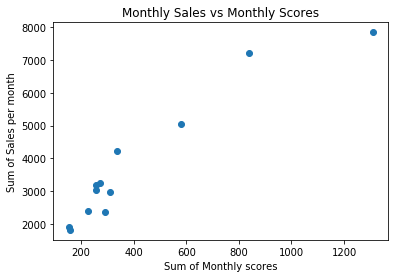

In [276]:
plt.scatter(w,d)
plt.title('Monthly Sales vs Monthly Scores')
plt.ylabel('Sum of Sales per month')
plt.xlabel('Sum of Monthly scores')
plt.show()

### Correlation between Yearly scores and Yearly Sales

Lets check the correlation between yearly scores and the yearly sales. The expected outcome is that the more games that are released per month the more scores there should be. The expected correlation should be positive as it makes sense that the more games released by year increases the score counts by year. 

In [222]:
q = combined.groupby(combined.index.strftime('%Y'))['score'].sum()
f = combined.groupby(combined.index.strftime('%Y'))['Global_Sales'].sum()


In [212]:
np.corrcoef(f,q)

array([[ 1.        ,  0.89826326],
       [ 0.89826326,  1.        ]])

So now we used strftime to convert the index to a Year string and find the sum of the scores and the sum of the global sales per year. As seen above we use np.corrcoef to find the correlation matrix. We are finding the correltion matrix between global sales vs the scores by year. We will then plot the results of the findings below. We are plotting the global sales sum with the scores sum. Yearly sales will be on the Y axis and the scores on the X axis. As we can see below the graph is pretty linear meaning there is a correlation. 

In [216]:
colors = ("red","green")

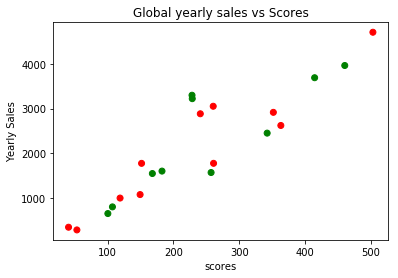

In [274]:
plt.scatter(f,q,  c=colors )
plt.title('Global yearly sales vs Scores')
plt.xlabel('scores')
plt.ylabel('Yearly Sales')
plt.show()

### Correlation between Games made vs Sales

So far we have found a correlation between global sales and the yearly scores. What we want to analyse and visualise now is if there is a correlation between the games made by year vs the sales made by year. The obvious result is that the more games there is made per year the more sales there will be. The expected correlation should be positive because the more games made the higher the sales should be. 

In [262]:
g = combined.groupby(combined.index.strftime('%Y'))['Genre'].count()


In [263]:
s = combined.groupby(combined.index.strftime('%Y'))['Global_Sales'].sum()


In [256]:
np.corrcoef(s,g)

array([[ 1.        ,  0.91084335],
       [ 0.91084335,  1.        ]])

Again there is a strong positive correlation meaning that the more games released per year the more sales there are. The correlation is at 0.91 meaning that the more games released the higher the sales which is expected. Once again we used strftime to count the number of games released by year then we used it again to find the total global sales by year. Yearly sales in terms of millions is on the Y axis and games by year is on the X axis.

In [257]:
color = ("yellow","blue")

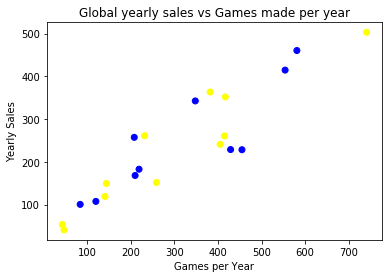

In [261]:
plt.scatter(g,s,  c=color )
plt.title('Global yearly sales vs Games made per year')
plt.xlabel('Games per Year')
plt.ylabel('Yearly Sales')
plt.show()

# Saving to a Pickle

In [ ]:
combined.to_pickle("../../data/analysis/300_Best_Month.pkl")